In [3]:
# Essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Machine Learning algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
# Metrics for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import re

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Set visualization aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
df = pd.read_csv('imputed_decoded_dataset2.csv',nrows=6000)
df.head()
df.columns


Index(['Unnamed: 0', 'YearlyCompensation', 'Age', 'Gender', 'Location',
       'JobTitle', 'CompanyName', 'Description', 'PayPeriod', 'SalaryMin',
       'WorkType', 'WorkType.1', 'ListedTime', 'ApplicationType',
       'ExperienceLevel', 'ListedTime.1', 'PostingDomain', 'WorkType.2',
       'WorkType.3', 'Currency', 'CompensationType', 'ZipCode',
       'MLIncorporation', 'CoursesCoursera', 'MLExperienceYears', 'Education',
       'DataScienceTeamSize', 'CompanySize', 'Industry', 'PrimaryToolSelected',
       'RemoteFriendly', 'SalaryMedian'],
      dtype='object')

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np



# Step 1: Define job title levels
def job_level(title):
    title = title.lower()  # Convert to lowercase for consistency
    if "intern" in title or "junior" in title or "assistant" in title:
        return 1  # Entry-Level
    elif "analyst" in title or "associate" in title or "specialist" in title:
        return 2  # Mid-Level
    elif "senior" in title or "lead" in title or "manager" in title:
        return 3  # Senior-Level
    elif "director" in title or "head" in title or "vp" in title or "vice president" in title:
        return 4  # Executive-Level
    elif "c-level" in title or "chief" in title or "officer" in title:
        return 5  # C-Level
    else:
        return 2  # Default to Mid-Level if unknown

# Apply job level function to categorize job titles
df['JobLevel'] = df['JobTitle'].apply(job_level)

# Select relevant columns including additional features
data = df[['Age', 'ExperienceLevel', 'Education', 'JobLevel']].copy()

# Step 2: Preprocess the Age column (convert age ranges to midpoints)
def convert_age(value):
    if '-' in value:
        start, end = map(int, value.split('-'))
        return (start + end) / 2
    elif value == '70+':
        return 75
    else:
        return pd.to_numeric(value, errors='coerce')

data['Age'] = data['Age'].apply(convert_age)

# Drop any rows with missing values in 'Age' or 'JobLevel'
data = data.dropna(subset=['Age', 'JobLevel', 'ExperienceLevel', 'Education'])

# Step 3: One-hot encode categorical variables like 'ExperienceLevel' and 'Education'
data = pd.get_dummies(data, columns=['ExperienceLevel', 'Education'], drop_first=True)

# Define features and target variable
X = data.drop(columns='JobLevel')
y = data['JobLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVR with RBF kernel
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.44073121585311686
Mean Squared Error (MSE): 0.5036268043572615
Root Mean Squared Error (RMSE): 0.7096666853934046
R² Score: 0.01906673807320436


Columns in the dataset: Index(['Unnamed: 0', 'YearlyCompensation', 'Age', 'Gender', 'Location',
       'JobTitle', 'CompanyName', 'Description', 'PayPeriod', 'SalaryMin',
       'WorkType', 'WorkType.1', 'ListedTime', 'ApplicationType',
       'ListedTime.1', 'PostingDomain', 'WorkType.2', 'WorkType.3', 'Currency',
       'CompensationType', 'ZipCode', 'MLIncorporation', 'CoursesCoursera',
       'MLExperienceYears', 'DataScienceTeamSize', 'CompanySize', 'Industry',
       'PrimaryToolSelected', 'RemoteFriendly', 'SalaryMedian', 'JobLevel',
       'ExperienceLevel_Director', 'ExperienceLevel_Entry level',
       'ExperienceLevel_Executive', 'ExperienceLevel_Internship',
       'ExperienceLevel_Mid-Senior level', 'Education_Doctoral degree',
       'Education_I prefer not to answer', 'Education_Master’s degree',
       'Education_No formal education past high school',
       'Education_Professional degree',
       'Education_Some college/university study without earning a bachelor’s deg

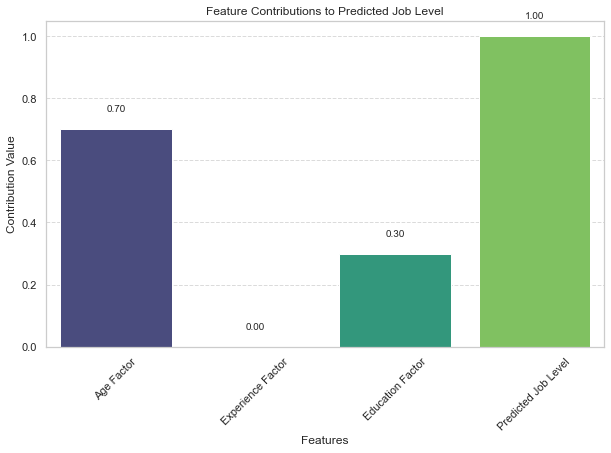

In [27]:


# Debugging: Print column names to verify expected columns
print("Columns in the dataset:", df.columns)

# Convert Age ranges to midpoints
def convert_age(value):
    if isinstance(value, str):  # Check if the value is a string
        if '-' in value:
            start, end = map(int, value.split('-'))
            return (start + end) / 2
        elif value == '70+':
            return 75
    return pd.to_numeric(value, errors='coerce')  # Convert numeric strings or keep as NaN

# Apply the age conversion
df['Age'] = df['Age'].apply(convert_age)

# Drop rows with missing Age or JobLevel
df = df.dropna(subset=['Age', 'JobLevel'])

# Update column names dynamically
experience_columns = [col for col in df.columns if "ExperienceLevel_" in col]
education_columns = [col for col in df.columns if "Education_" in col]

# Debugging: Print identified columns for ExperienceLevel and Education
print("Identified ExperienceLevel columns:", experience_columns)
print("Identified Education columns:", education_columns)

# Define the function to plot feature contributions
def plot_feature_contributions_from_data(row_index):
    """
    Plots feature contributions for a specific row in the dataset.
    Args:
    - row_index (int): Index of the row to analyze
    """
    # Extract the row based on the provided index
    row = df.iloc[row_index]

    # Debugging: Print the row to verify the values
    print("Row data:", row)

    # Extract feature values for Age
    age = row['Age']

    # Ensure numeric values for experience and education columns
    experience = sum(
        pd.to_numeric(row.get(col, 0), errors='coerce') * (i + 1)
        for i, col in enumerate(experience_columns)
    )

    # Debugging: Print the experience contribution value
    print("Experience Contribution:", experience)

    education = sum(
        pd.to_numeric(row.get(col, 0), errors='coerce') * (i + 1)
        for i, col in enumerate(education_columns)
    )

    # Debugging: Print the education contribution value
    print("Education Contribution:", education)

    # Mock prediction calculation
    age_contribution = (age - 20) / 10
    experience_contribution = experience * 0.5
    education_contribution = education * 0.3
    predicted = age_contribution + experience_contribution + education_contribution

    # Normalize contributions
    total_contribution = age_contribution + experience_contribution + education_contribution
    age_contribution_normalized = age_contribution / total_contribution * predicted
    experience_contribution_normalized = experience_contribution / total_contribution * predicted
    education_contribution_normalized = education_contribution / total_contribution * predicted

    # Data for the plot
    feature_values = {
        "Age Factor": age_contribution_normalized,
        "Experience Factor": experience_contribution_normalized,
        "Education Factor": education_contribution_normalized,
        "Predicted Job Level": predicted
    }

    # Create the bar plot
    features = list(feature_values.keys())
    values = list(feature_values.values())

    plt.figure(figsize=(10, 6))
    sns.barplot(x=features, y=values, palette="viridis")
    plt.title("Feature Contributions to Predicted Job Level")
    plt.ylabel("Contribution Value")
    plt.xlabel("Features")
    plt.xticks(rotation=45)

    # Annotate the bars with their values
    for i, value in enumerate(values):
        plt.text(i, value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Example usage
plot_feature_contributions_from_data(0)  # Visualize for the first row


In [7]:
import pickle

# Save the SVR model
with open('svr_model.pkl', 'wb') as file:
    pickle.dump(svr, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("SVR model and scaler saved!")


SVR model and scaler saved!
